In [1]:
import nltk

In [3]:
text = nltk.word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [4]:
text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

Note: Many words, like ski and race, can be used as nouns or verbs with no difference in pronunciation. Can you think of others? Hint: think of a commonplace object and try to put the word to before it to see if it can also be a verb, or think of an action and try to put the before it to see if it can also be a noun. Now make up a sentence with both uses of this word, and run the POS-tagger on this sentence.

In [6]:
print(nltk.pos_tag(nltk.word_tokenize("I run")))
print(nltk.pos_tag(nltk.word_tokenize("I go to the run")))

[('I', 'PRP'), ('run', 'VBP')]
[('I', 'PRP'), ('go', 'VBP'), ('to', 'TO'), ('the', 'DT'), ('run', 'NN')]


In [12]:
nltk.corpus.brown.tagged_words()[:10]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN')]

In [11]:
nltk.corpus.brown.tagged_words(tagset='universal')[:10]

[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN'),
 ('said', 'VERB'),
 ('Friday', 'NOUN'),
 ('an', 'DET'),
 ('investigation', 'NOUN'),
 ('of', 'ADP')]

In [28]:
nltk.corpus.sinica_treebank.tagged_words()[:20]

[('一', 'Neu'),
 ('友情', 'Nad'),
 ('嘉珍', 'Nba'),
 ('和', 'Caa'),
 ('我', 'Nhaa'),
 ('住在', 'VC1'),
 ('同一條', 'DM'),
 ('巷子', 'Nab'),
 ('我們', 'Nhaa'),
 ('是', 'V_11'),
 ('鄰居', 'Nab'),
 ('也', 'Dbb'),
 ('是', 'V_11'),
 ('同班', 'Nv3'),
 ('同學', 'Nab'),
 ('我們', 'Nhaa'),
 ('常常', 'Dd'),
 ('一起', 'Dh'),
 ('上學', 'VA4'),
 ('一起', 'Dh')]

Note: Plot the above frequency distribution using `tag_fd.plot(cumulative=True)`. What percentage of words are tagged using the first five tags of the above list?

[('NOUN', 30654), ('VERB', 14399), ('ADP', 12355), ('.', 11928), ('DET', 11389), ('ADJ', 6706), ('ADV', 3349), ('CONJ', 2717), ('PRON', 2535), ('PRT', 2264), ('NUM', 2166), ('X', 92)]


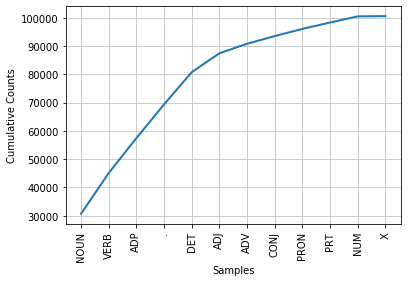

[('NOUN', 30.485112476878097),
 ('VERB', 14.319669033554112),
 ('ADP', 12.286930405553235),
 ('.', 11.862282952443463),
 ('DET', 11.326252560813096)]

In [36]:
brown_news_tagged = nltk.corpus.brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)

print(tag_fd.most_common())

tag_fd.plot(cumulative=True)

[(tag, nb / len(brown_news_tagged) * 100) for (tag, nb) in tag_fd.most_common(5)]

In [9]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
[wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB'][:10]

['is', 'said', 'was', 'are', 'be', 'has', 'have', 'will', 'says', 'would']

In [14]:
cfd1 = nltk.ConditionalFreqDist(wsj)

print(cfd1['yield'].most_common())
print(cfd1['cut'].most_common())
print(cfd1['run'].most_common())

[('VERB', 28), ('NOUN', 20)]
[('VERB', 25), ('NOUN', 3)]
[('VERB', 16), ('NOUN', 2)]


In [51]:
filter_func = lambda word, cfd_list: (
    len(cfd_list) == 2 and cfd_list[0][0] == 'NOUN'
    and cfd_list[1][0] == 'VERB' and cfd_list[0][1] > cfd_list[1][1]
)

[word for word in cfd1 if filter_func(word, cfd_list = cfd1[word].most_common())][:10]

['publishing',
 'form',
 'show',
 'risk',
 'amounts',
 'rate',
 'finding',
 'study',
 'contract',
 'support']

In [2]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
list(cfd2['VBN'])[:10]

['named',
 'used',
 'caused',
 'exposed',
 'reported',
 'replaced',
 'sold',
 'died',
 'expected',
 'diagnosed']

Note: Given the list of past participles produced by `list(cfd2['VN'])`, try to collect a list of all the word-tag pairs that immediately precede items in that list.

In [3]:
list(cfd2['VN']) # ...

[]